# Proyecto Ciencia de Datos en Python

### Caga de Dataset y Split

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#carga de datos
dataset = np.load('proyecto_data/proyecto_training_data.npy')

np.shape(dataset)
split_row = int(dataset.shape[0]*0.8)
#escalamos los valores las variables SalePrice y 1stFlrSF en 1000 para que los cálculos del error no sean elevados duratne el entrenamiento
dataset[0:, 0]/= 1000 
dataset[0:, 2]/= 1000

#realizamos el Train - Test split
train_dataset = dataset[0: split_row,:]
test_dataset  = dataset[split_row : , :]

## Análisis Exploratorio de Datos

In [2]:
variables=["SalePrice (en miles)", "OverallQual", "1stFlrSF (en miles)","TotRmsAbvGrd","YearBuilt","LotFrontage"]

df = pd.DataFrame(dataset, columns=variables)
describe_df = df.describe() #utilizamos describe para obtener los datos de estadística descriptiva
describe_df = describe_df.append(pd.Series(df.max()-df.min(),name="range"))
describe_df = describe_df.drop(["count","25%","50%","75%"]) #eliminamos las filas que no nos interesan desplegar
describe_df = describe_df.reindex(["mean","max","min","range", "std"])

describe_df


,SalePrice (en miles),OverallQual,1stFlrSF (en miles),TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180.921196,6.099315,1.162627,6.517808,1971.267808,70.049958
max,755.000000,10.000000,4.692000,14.000000,2010.000000,313.000000
min,34.900000,1.000000,0.334000,2.000000,1872.000000,21.000000
range,720.100000,9.000000,4.358000,12.000000,138.000000,292.000000
std,79.442503,1.382997,0.386588,1.625393,30.202904,24.284752


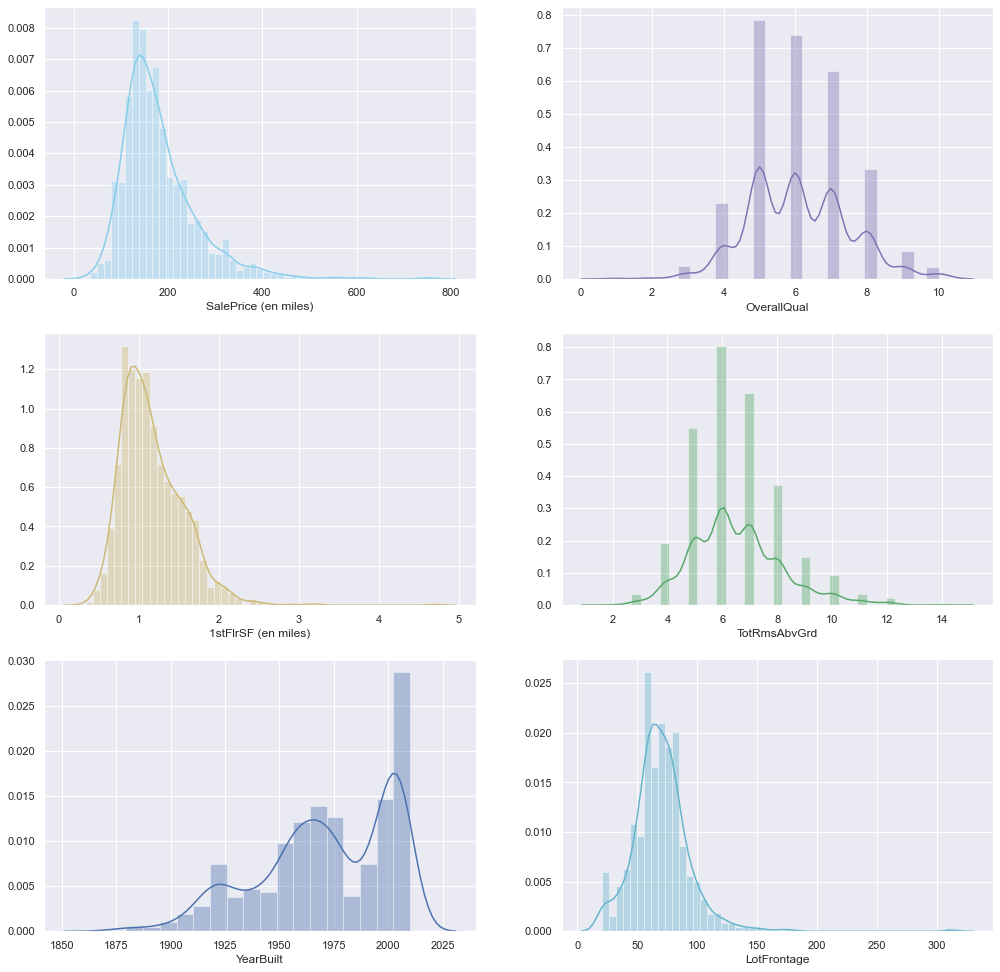

In [3]:
sns.set();

f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))
colors = ["skyblue","m","y","g","b","c"]
for i in range(0,len(variables)): 
    sns.distplot(df[variables[i]] , color=colors[i], ax=axes[i//2,i%2])
    
plt.show()

## Correlación de Variables

In [4]:
correlation = []
for i in range(1,len(variables)): #se excluye el precio ya que esta es la variable contra la que se correlaciona
    correlation.append(df[variables[0]].corr(df[variables[i]]))

corr = pd.Series(correlation, name=variables[0], index=variables[1:])
corr.to_frame().T

,OverallQual,1stFlrSF (en miles),TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice (en miles),0.790982,0.605852,0.533723,0.522897,0.351799


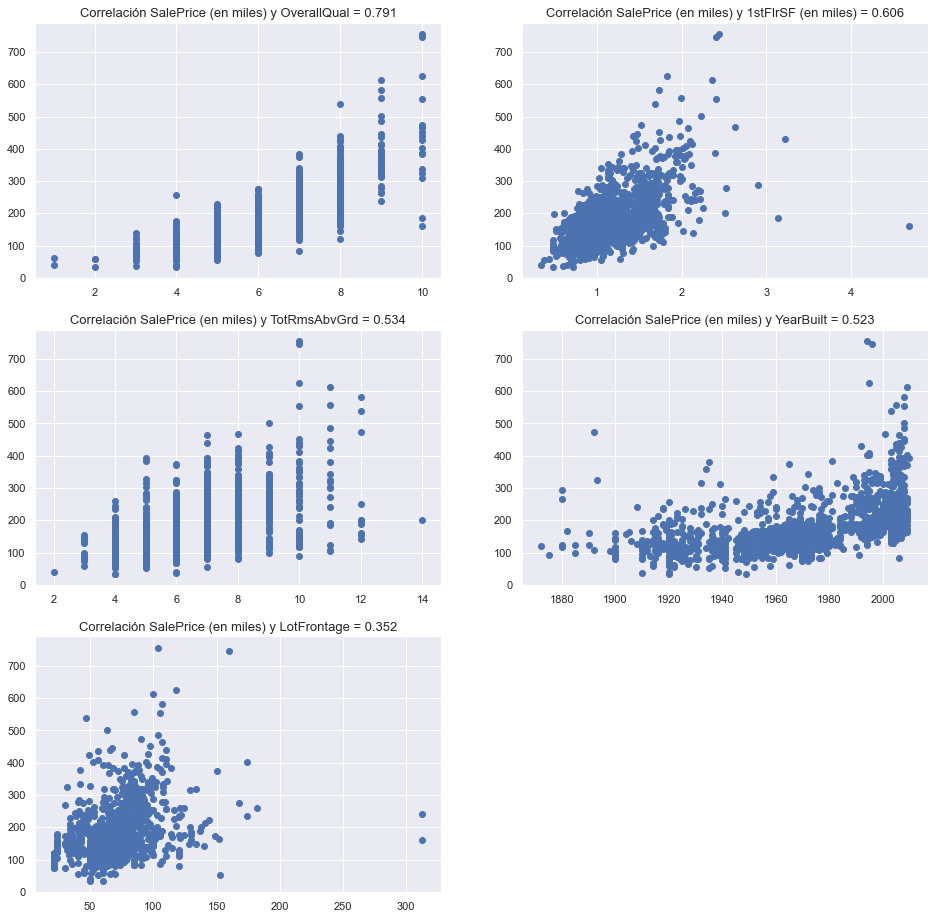

In [5]:
f,axes = plt.subplots(3,2,sharex=False, figsize=(16,16))

for i in range(1,len(variables)):
    plt.subplot(3,2,i)
    plt.scatter(df[variables[i]], df[variables[0]])
    plt.title("Correlación "+variables[0]+" y "+variables[i]+" = "+str(round(corr[variables[i]],3)), FontSize=13)

f.delaxes(axes[2,1])
plt.show()

## Elección de Variables con Potencial Predictivo

Basado en los datos calculados y la gráficas generadas, podemos concluír que las variables con más potencial predictivo son:

-  Calidad General (OverallQual)
-  Pies cuadrados en el primer piso (1stFlrSF)

## Entrenamiento Manual del Modelo

### Función de Entrenamiento

In [6]:
def train_model(x,y,epochs,print_interval,lr):
    errors = np.zeros(epochs)
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones)) #matriz con x en la primer columna y 1 en la segun
    model_dict = {}
    model = np.array([0.0,0.0]) #[m,b]
    gradients = np.array([0.0,0.0])
    print_counter = 1
    for i in range(0,epochs):
        yhat = (np.matmul(data,model)).reshape(-1,1)
        errors[i] = 0.5 * (np.average((y-yhat)**2))
        gradients = np.average((yhat-y)*data, axis=0)
        model -= (lr*gradients)
        model_dict[i] = model.copy()
        if (print_counter % print_interval) == 0:
            print("Error: "+str(errors[i]))
        
        print_counter += 1
    return model_dict,errors

### Función para graficar el error del entrenamiento en el tiempo

In [7]:
def plot_error(errors,title):
    plt.plot(range(0,errors.shape[0]),errors)
    plt.title(title+" - Errors")
    plt.show()

### Función para graficar la evolución el entrenamiento en el Tiempo

In [8]:
def plot_model(x,y,model, n):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    for i in range(n,len(model)+1,n):
        key = i-1
        yhat = (np.matmul(data,model[key])).reshape(-1,1)
        
        plt.plot()
        plt.scatter(x,y)
        plt.plot(x,yhat, color='g')
        plt.title("Iteración="+str(i)+", m="+str(round(model[key][0],2))+", b="+str(round(model[key][1],2)))
        plt.show()
        

### Entrenamiento de variable independiente OverallQuality

In [9]:
x = train_dataset[:,1].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)

Error: 38187.07661940325
Error: 77313.41071065911
Error: 158089.7872872952
Error: 324731.23231436947
Error: 668436.5218050168
Error: 1377296.7377779458
Error: 2839225.7866537482
Error: 5854240.005881932
Error: 12072253.233829983
Error: 24895962.977537937


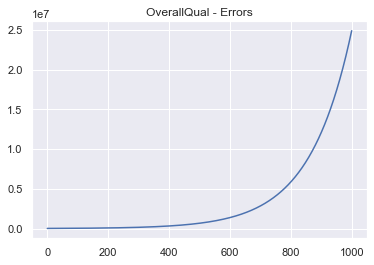

Error: 9529.508397186688
Error: 5038.410635515049
Error: 3026.4676001106845
Error: 2125.07674736828
Error: 1721.1644522871982
Error: 1540.100749056788
Error: 1458.8635158884372
Error: 1422.344263720589
Error: 1405.856817983038
Error: 1398.342860278944


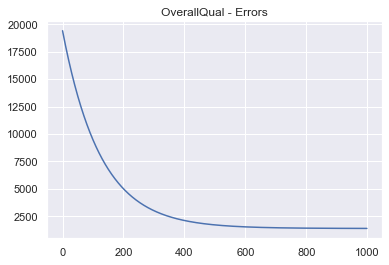

Error: 1314.9588684815246
Error: 1245.2591024867386
Error: 1208.712736552814
Error: 1185.7505147334666
Error: 1171.3205493528799
Error: 1162.2524400185366
Error: 1156.5538395891726
Error: 1152.9727130658566
Error: 1150.7222539689324
Error: 1149.3080157078841


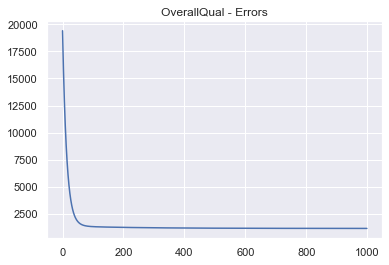

In [10]:
model_quality, errors_quality = train_model(x,y,1000,100,0.05)
plot_error(errors_quality,variables[1])

model_quality, errors_quality = train_model(x,y,1000,100,0.0001)
plot_error(errors_quality,variables[1])

model_quality, errors_quality = train_model(x,y,1000,100,0.049)
plot_error(errors_quality,variables[1])

Como podemos observar en los resultados, si utilizamos un learning rate mayor o igual a 0.5 el error comienza a incrementar y si utilizamos un valor muy pequeño, este se tarda mucho en converger a un valor estable por lo cual se toma el modelo obtenido con un learning rate de 0.49.

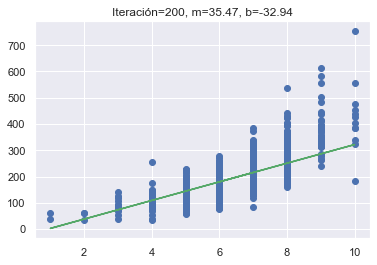

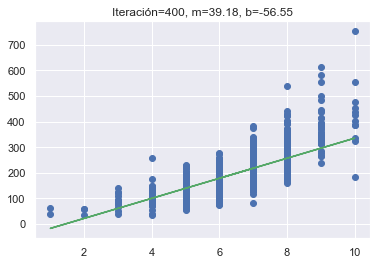

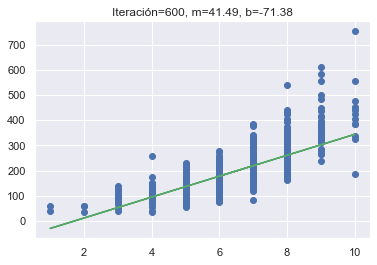

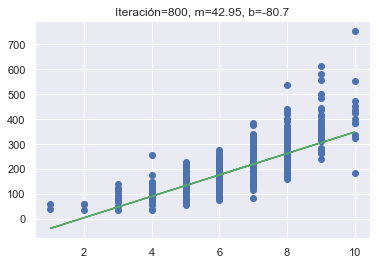

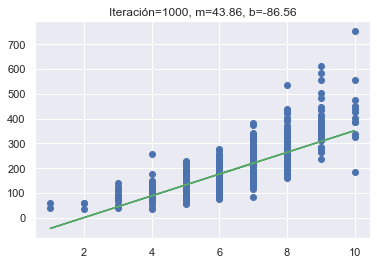

In [11]:
plot_model(x,y,model_quality,200)

### Entrenamiento de variable independiente 1stFlrSF (en miles)

Error: 85964619681.65042
Error: 4.316572390935849e+17
Error: 2.167496080638319e+24
Error: 1.0883726332140962e+31
Error: 5.465084801355314e+37
Error: 2.744202764250182e+44
Error: 1.3779564425885262e+51
Error: 6.919182439457053e+57
Error: 3.474354061624106e+64
Error: 1.7445899499178206e+71


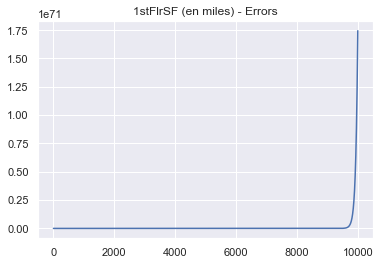

Error: 12744.552437521848
Error: 8630.50369762308
Error: 6094.168758309017
Error: 4530.348026874666
Error: 3565.993878286053
Error: 2971.1581357476716
Error: 2604.0997238128134
Error: 2377.4487952777176
Error: 2237.3501569257437
Error: 2150.6071895787177


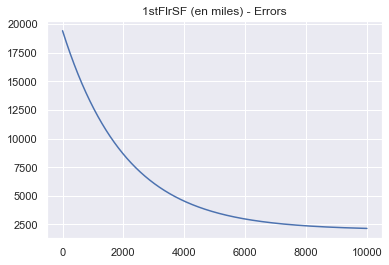

Error: 1924.6288619601225
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516
Error: 1924.6288619600516


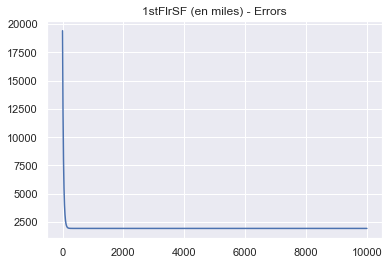

In [12]:
x = train_dataset[:,2].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.83)
plot_error(errors_1flrsf,variables[2])

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.0001)
plot_error(errors_1flrsf,variables[2])

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.82)
plot_error(errors_1flrsf,variables[2])

Como podemos observar en los resultados, si utilizamos un learning rate mayor o igual a 0.83 el error comienza a incrementar y si utilizamos un valor muy pequeño, este se tarda mucho en converger a un valor estable por lo cual se toma el modelo obtenido con un learning rate de 0.82.

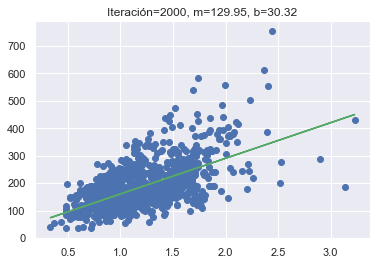

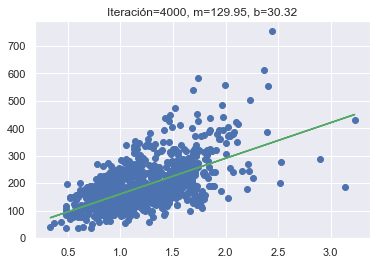

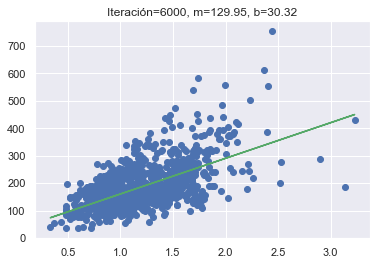

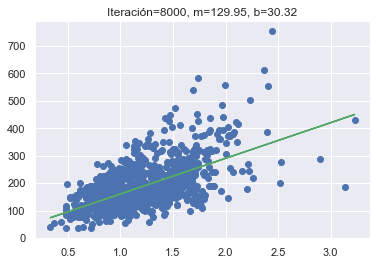

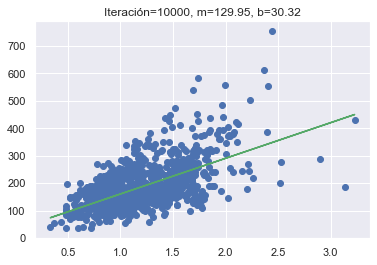

In [13]:
plot_model(x,y,model_1flrsf,2000)

## Entrenamiento del Modelo con scikit-learn

### Entrenamiento de variable independiente OverallQuality

In [14]:
x = train_dataset[:,1].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)

lreg_quality = LinearRegression()
lreg_quality.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Entrenamiento de variable independiente 1stFlrSF (en miles)

In [15]:
x = train_dataset[:,2].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)

lreg_1flrsf = LinearRegression()
lreg_1flrsf.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtener Predicciones de Ambos Modelos con Datos de Prueba

### Creamos la función que recibe los modelos y retorna las predicciones

In [16]:
def get_predictions(x, manual_model, sl_model):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    manual_pred = np.matmul(data,manual_model)
    sl_pred = sl_model.predict(x)
    avg_pred = (manual_pred + sl_pred)/2
        
    return manual_pred, sl_pred, avg_pred
    

In [17]:
def calculate_error(y,yhat):
    return (0.5 * (np.average((y-yhat)**2)))

### Cálculo de predicciones y error en variable OverallQuality

In [18]:
x = test_dataset[:,1].reshape(-1,1)
y = test_dataset[:,0].reshape(-1,1)

manual_pred_quality, sl_pred_quality, avg_pred_quality = get_predictions(x, model_quality[(len(model_quality)-1)], lreg_quality )
manual_error_quality = calculate_error(y,manual_pred_quality)
sl_error_quality = calculate_error(y,sl_pred_quality)
avg_error_quality = calculate_error(y,avg_pred_quality)

print("Error Modelo Manual: "+str(round(manual_error_quality,2)))
print("Error Modelo scikit-learn: "+str(round(sl_error_quality,2)))
print("Error Promedio: "+str(round(avg_error_quality,2)))

Error Modelo Manual: 5246.74
Error Modelo scikit-learn: 1315.09
Error Promedio: 2300.5


### Cálculo de predicciones y error en variable 1stFlrSF

In [19]:
x = test_dataset[:,2].reshape(-1,1)
y = test_dataset[:,0].reshape(-1,1)

manual_pred_1flrsf, sl_pred_1flrsf, avg_pred_1flrsf = get_predictions(x, model_1flrsf[(len(model_1flrsf)-1)], lreg_1flrsf )
manual_error_1flrsf = calculate_error(y,manual_pred_1flrsf)
sl_error_1flrsf = calculate_error(y,sl_pred_1flrsf)
avg_error_1flrsf = calculate_error(y,avg_pred_1flrsf)

print("Error Modelo Manual: "+str(round(manual_error_1flrsf,2)))
print("Error Modelo scikit-learn: "+str(round(sl_error_1flrsf,2)))
print("Error Promedio: "+str(round(avg_error_1flrsf,2)))

Error Modelo Manual: 4939.49
Error Modelo scikit-learn: 2292.77
Error Promedio: 2824.22


### Gráfica de errores obtenidos para cada modelo

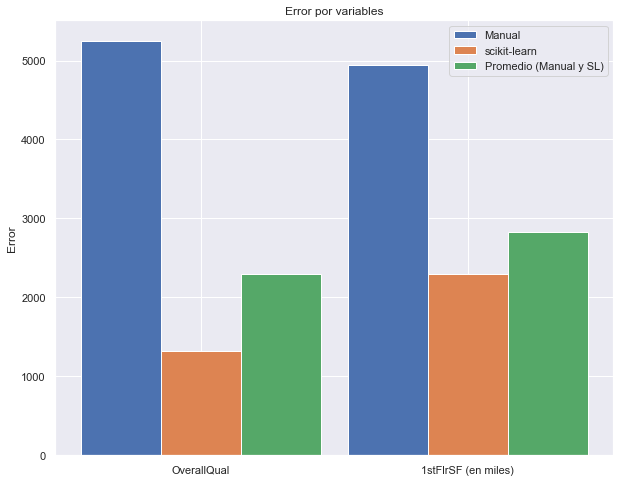

In [20]:
f, ax = plt.subplots(figsize=(10,8))
labels = [variables[1], variables[2]]
width = 0.30
x_plt = np.arange(len(labels))

rects1 = ax.bar(x_plt, (manual_error_quality,manual_error_1flrsf), width, label='Manual')
rects2 = ax.bar(x_plt + width, (sl_error_quality,sl_error_1flrsf), width, label='scikit-learn')
rects3 = ax.bar(x_plt + (2*width), (avg_error_quality,avg_error_1flrsf), width, label='Promedio (Manual y SL)')

ax.set_ylabel('Error')
ax.set_title('Error por variables')
ax.set_xticks(x_plt + width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Conclusión

Como puede observarse en la gráfica de comparación el modelo con menor error es el obtenido por medio de scikit-learn tanto para la variable OverallQual como para la variable 1stFlrSF.